In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5002/data/Data_Q4/retail.csv')
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y/%m/%d %H:%M')
data=data[:1000000]

In [4]:
data

,Transaction_id,Product_id,Description,Quantity,Date,Price,Customer ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0
...,...,...,...,...,...,...,...
999995,576840,82582,AREA PATROLLED METAL SIGN,2.0,2011-11-16 15:23:00,4.13,NaN
999996,576840,82583,HOT BATHS METAL SIGN,1.0,2011-11-16 15:23:00,4.13,NaN
999997,576840,82616B,FRAPPUCINO SCARF KNITTING KIT,2.0,2011-11-16 15:23:00,2.46,NaN
999998,576840,82616C,MIDNIGHT GLAMOUR SCARF KNITTING KIT,5.0,2011-11-16 15:23:00,2.46,NaN


## preprocessing

In [5]:
missing_values = data.isnull().sum()
missing_values

Transaction_id         0
Product_id             0
Description         4331
Quantity               0
Date                   0
Price                  0
Customer ID       225498
dtype: int64

In [6]:
# Check for any missing values
data.dropna(inplace=True)
len(data)

774502

In [7]:
#Remove rows with negative quantities or prices, as they may indicate returns.
data=data[(data['Quantity'] > 0) & (data['Price'] > 0)]
len(data)

756531

In [ ]:
# Add a 'TotalPrice' column for the total price of the transaction
data['TotalPrice'] = data['Quantity'] * data['Price']

In [36]:
data['Year'] = data['Date'].dt.year
data

<ipython-input-36-a844fbdf328b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year


,Transaction_id,Product_id,Description,Quantity,Date,Price,Customer ID,TotalPrice,Year,DayOfWeek
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,83.40,2009,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,81.00,2009,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,81.00,2009,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,100.80,2009,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,30.00,2009,Tuesday
...,...,...,...,...,...,...,...,...,...,...
999516,576838,23433,HANGING QUILTED PATCHWORK APPLES,12.0,2011-11-16 15:21:00,0.83,18075.0,9.96,2011,Wednesday
999517,576838,84836,ZINC METAL HEART DECORATION,12.0,2011-11-16 15:21:00,1.25,18075.0,15.00,2011,Wednesday
999518,576838,23569,TRADTIONAL ALPHABET STAMP SET,4.0,2011-11-16 15:21:00,4.95,18075.0,19.80,2011,Wednesday
999519,576838,23457,LARGE PARLOUR PICTURE FRAME,3.0,2011-11-16 15:21:00,4.95,18075.0,14.85,2011,Wednesday


## pictures

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

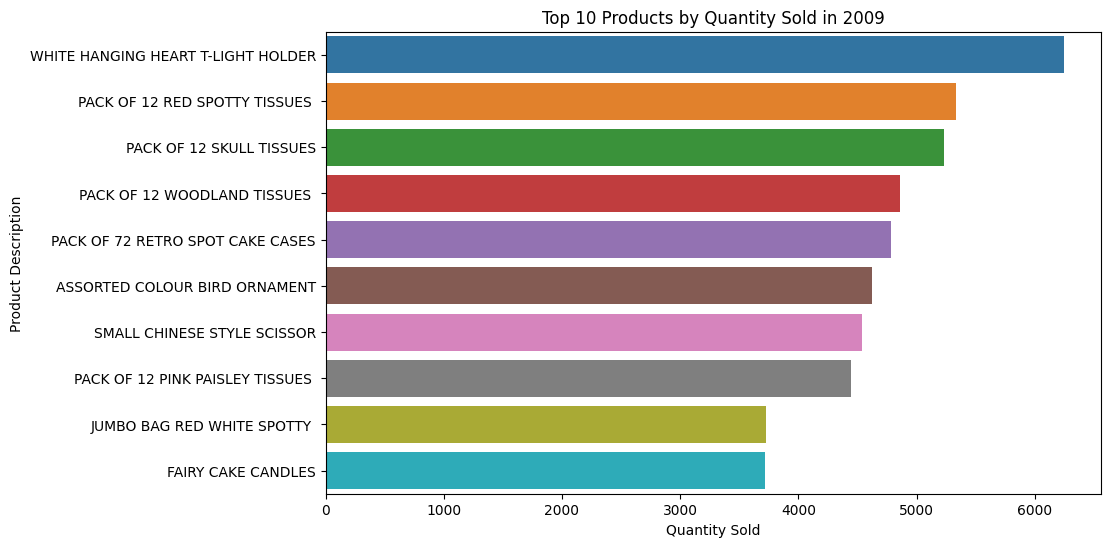

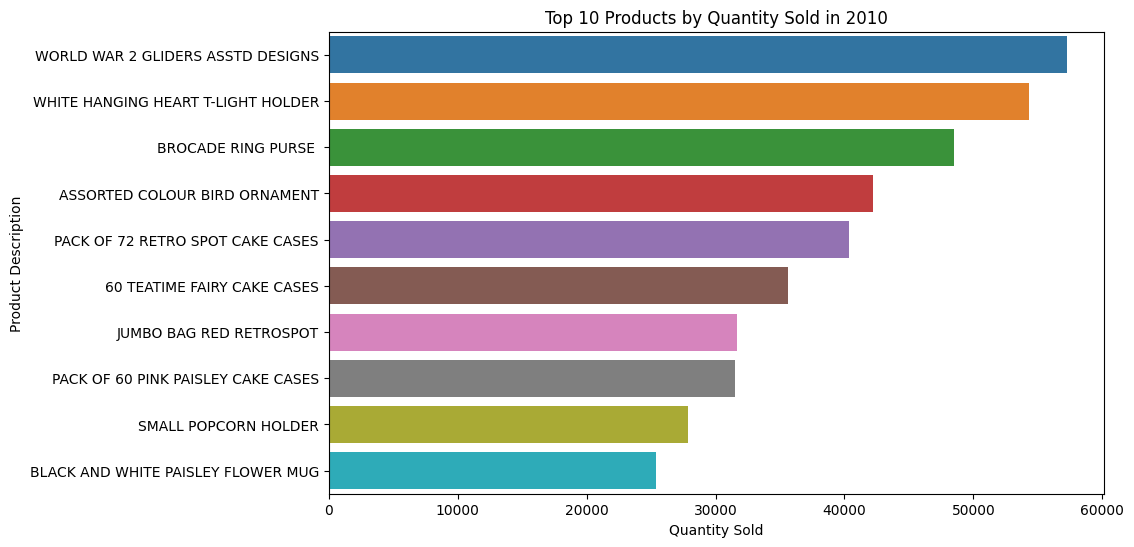

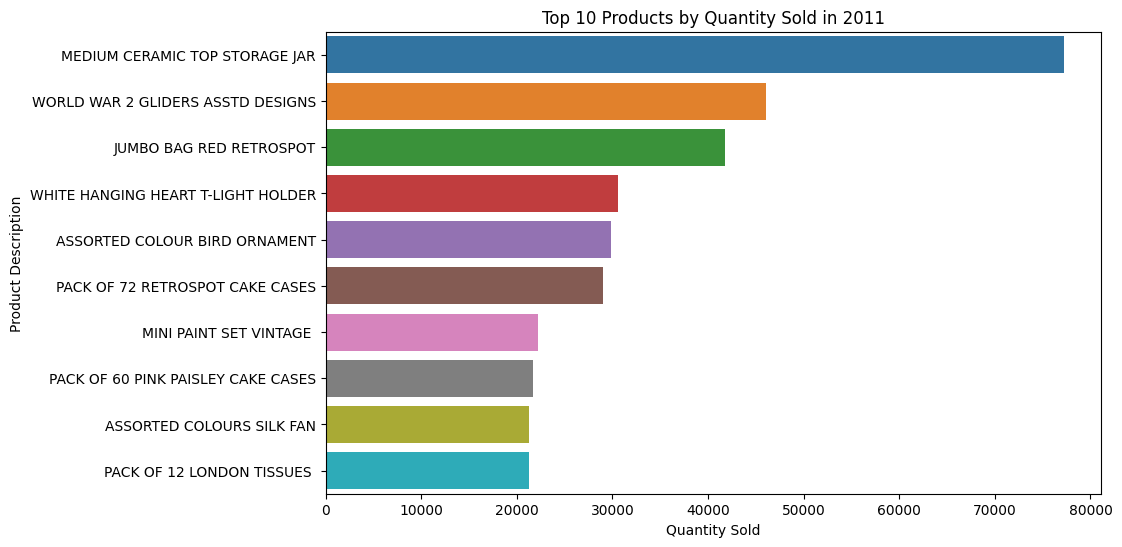

In [23]:
#Total Sales Volume per Product per Year
yearly_product_sales = data.groupby(['Year', 'Description'])['Quantity'].sum().reset_index()
for year in yearly_product_sales['Year'].unique():
    top_products_year = yearly_product_sales[yearly_product_sales['Year'] == year].sort_values(by='Quantity', ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_products_year, x='Quantity', y='Description', orient='h')
    plt.title(f'Top 10 Products by Quantity Sold in {year}')
    plt.xlabel('Quantity Sold')
    plt.ylabel('Product Description')
    plt.show()

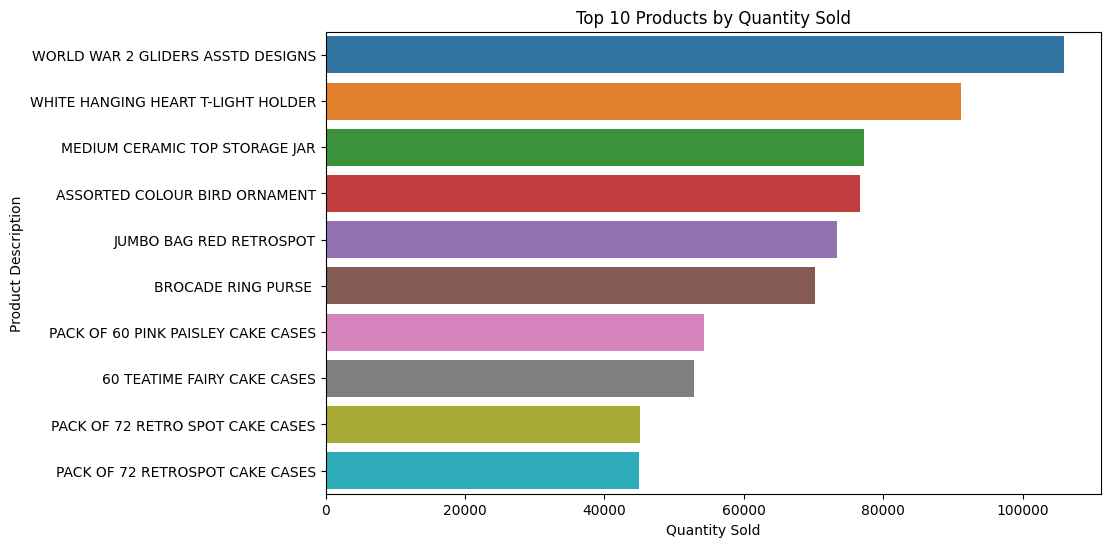

In [31]:
plt.figure(figsize=(10, 6))
quantity_distribution = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=quantity_distribution.values, y=quantity_distribution.index)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

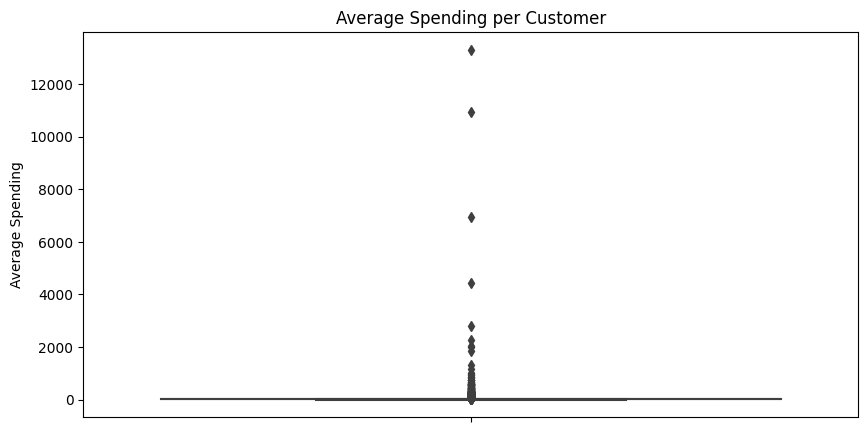

In [26]:
# Average Spending per Customer
plt.figure(figsize=(10, 5))
avg_spending = data.groupby('Customer ID')['TotalPrice'].mean().sort_values(ascending=False)
sns.boxplot(y=avg_spending)
plt.title('Average Spending per Customer')
plt.ylabel('Average Spending')
plt.show()

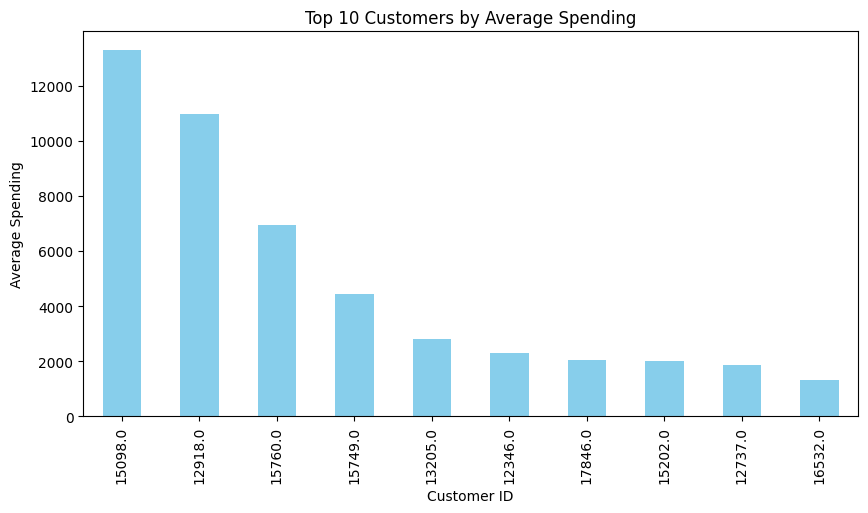

In [25]:
#Top 10 Customers by Average Spending
average_spending = data.groupby('Customer ID')['TotalPrice'].mean().sort_values(ascending=False)
average_spending.head(10).plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title('Top 10 Customers by Average Spending')
plt.ylabel('Average Spending')
plt.xlabel('Customer ID')
plt.show()

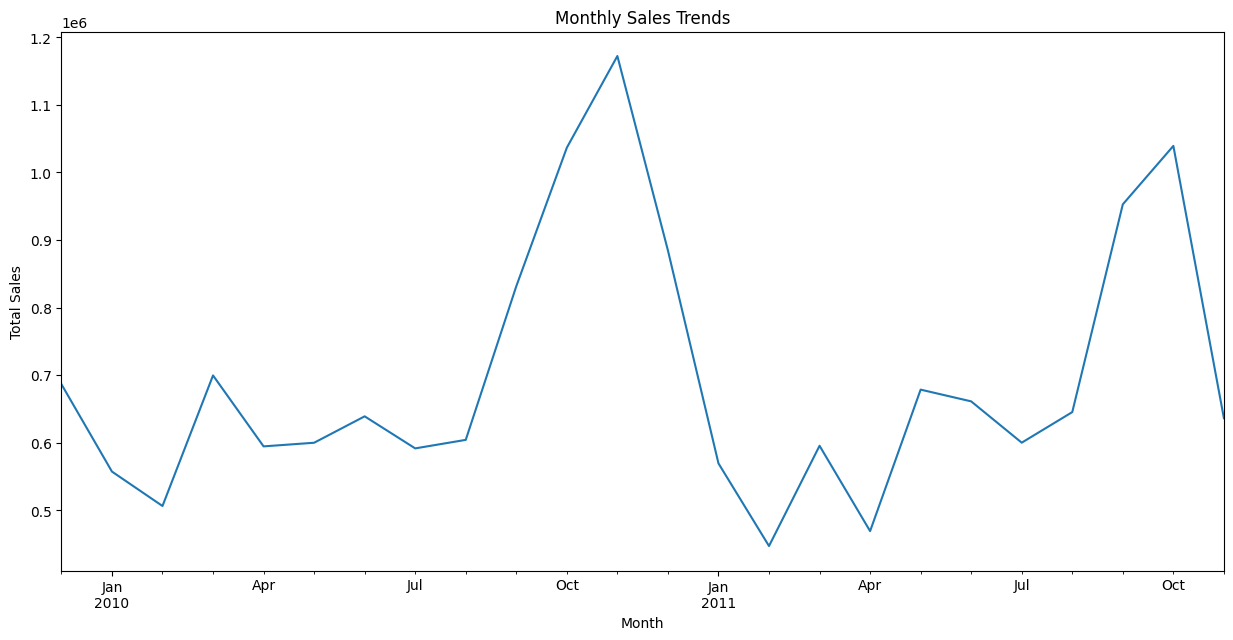

In [16]:
#Monthly Sales Trends
plt.figure(figsize=(15, 7))
monthly_sales = data.groupby(data['Date'].dt.to_period('M'))['TotalPrice'].sum()
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

<ipython-input-28-76d9d4017b79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DayOfWeek'] = data['Date'].dt.day_name()


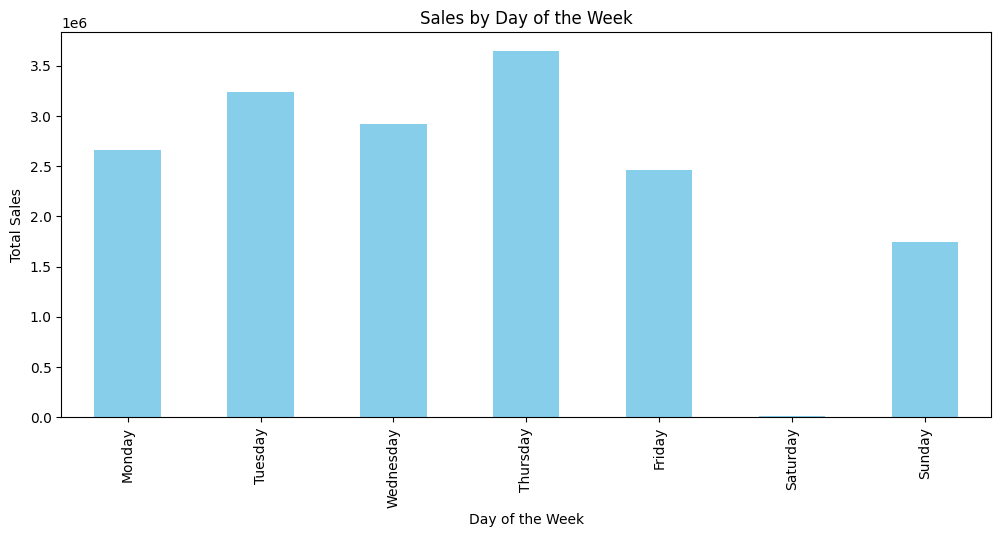

In [28]:
#Day of the Week Sales Analysis
plt.figure(figsize=(12, 5))
data['DayOfWeek'] = data['Date'].dt.day_name()
weekday_sales = data.groupby('DayOfWeek')['TotalPrice'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Day of the Week')
plt.ylabel('Total Sales')
plt.xlabel('Day of the Week')
plt.show()

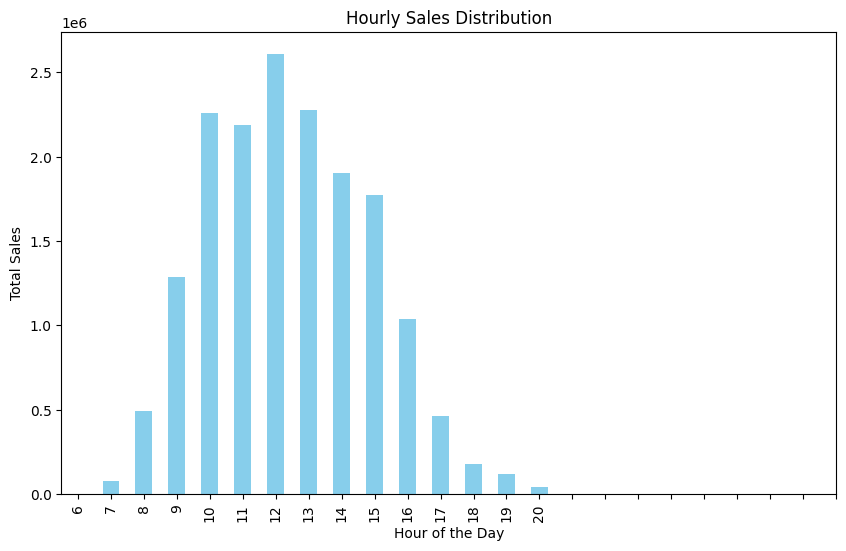

In [29]:
#Hourly Sales Distribution
plt.figure(figsize=(10, 6))
hourly_sales = data.groupby(data['Date'].dt.hour)['TotalPrice'].sum()
hourly_sales.plot(kind='bar', color='skyblue')
plt.title('Hourly Sales Distribution')
plt.ylabel('Total Sales')
plt.xlabel('Hour of the Day')
plt.xticks(range(0, 24))
plt.show()

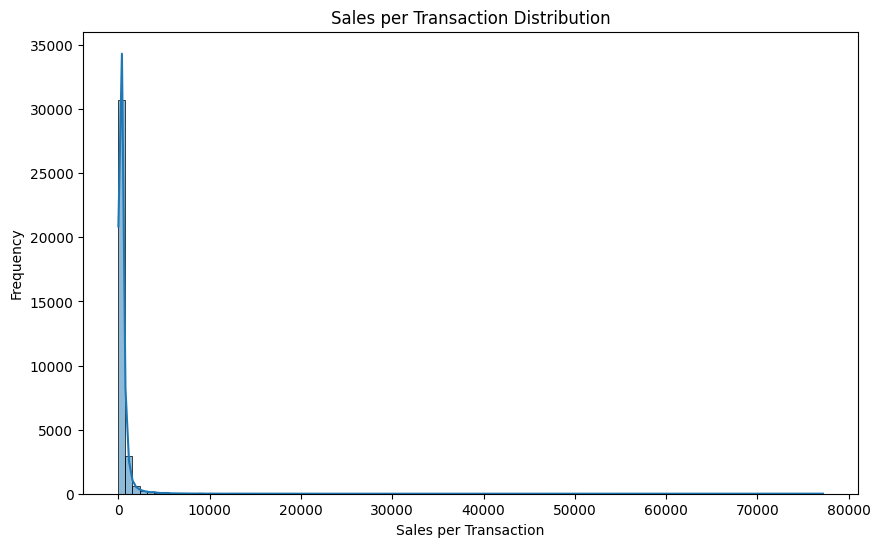

In [44]:
#Sales per Transaction Distribution
plt.figure(figsize=(10, 6))
sales_per_transaction = data.groupby('Transaction_id')['TotalPrice'].sum()
sns.histplot(sales_per_transaction, bins=100, kde=True)
plt.title('Sales per Transaction Distribution')
plt.xlabel('Sales per Transaction')
plt.ylabel('Frequency')
plt.show()

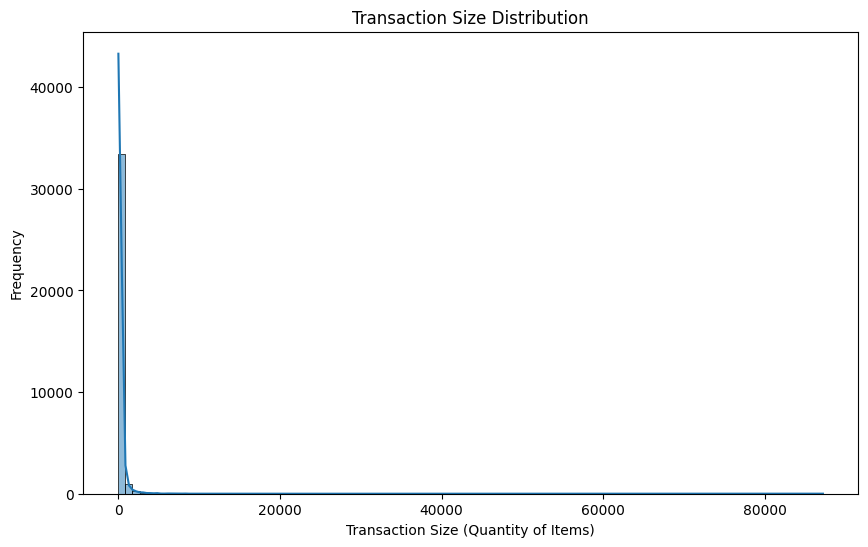

In [43]:
#Transaction Size Distribution
plt.figure(figsize=(10, 6))
transaction_size = data.groupby('Transaction_id')['Quantity'].sum()
sns.histplot(transaction_size, bins=100, kde=True)
plt.title('Transaction Size Distribution')
plt.xlabel('Transaction Size (Quantity of Items)')
plt.ylabel('Frequency')
plt.show()

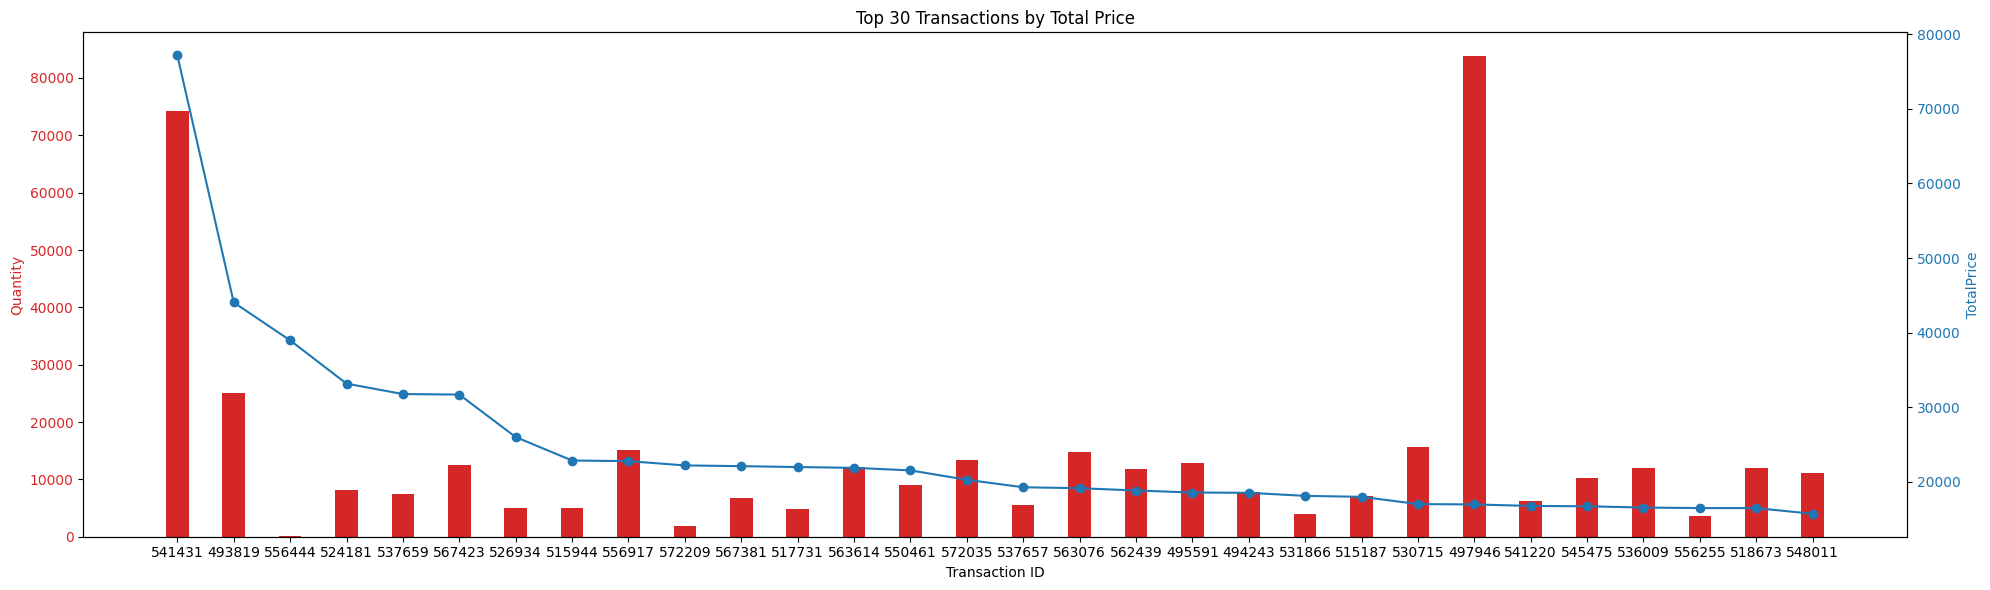

In [42]:
transaction_aggregate = data.groupby('Transaction_id').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

top_transactions = transaction_aggregate.nlargest(30, 'TotalPrice')

# Now plot with 'Transaction_id' on the x-axis and both 'Quantity' and 'TotalPrice' on the y-axes
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot 'Quantity' on the primary y-axis (left)
color = 'tab:red'
ax1.set_xlabel('Transaction ID')
ax1.set_ylabel('Quantity', color=color)
ax1.bar(top_transactions['Transaction_id'].astype(str), top_transactions['Quantity'], color=color, label='Quantity', width=0.4)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for 'TotalPrice'
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('TotalPrice', color=color)  # we already handled the x-label with ax1
ax2.plot(top_transactions['Transaction_id'].astype(str), top_transactions['TotalPrice'], color=color, marker='o', label='TotalPrice')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Top 30 Transactions by Total Price')
fig.tight_layout()  # to make sure layout doesn't overlap
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


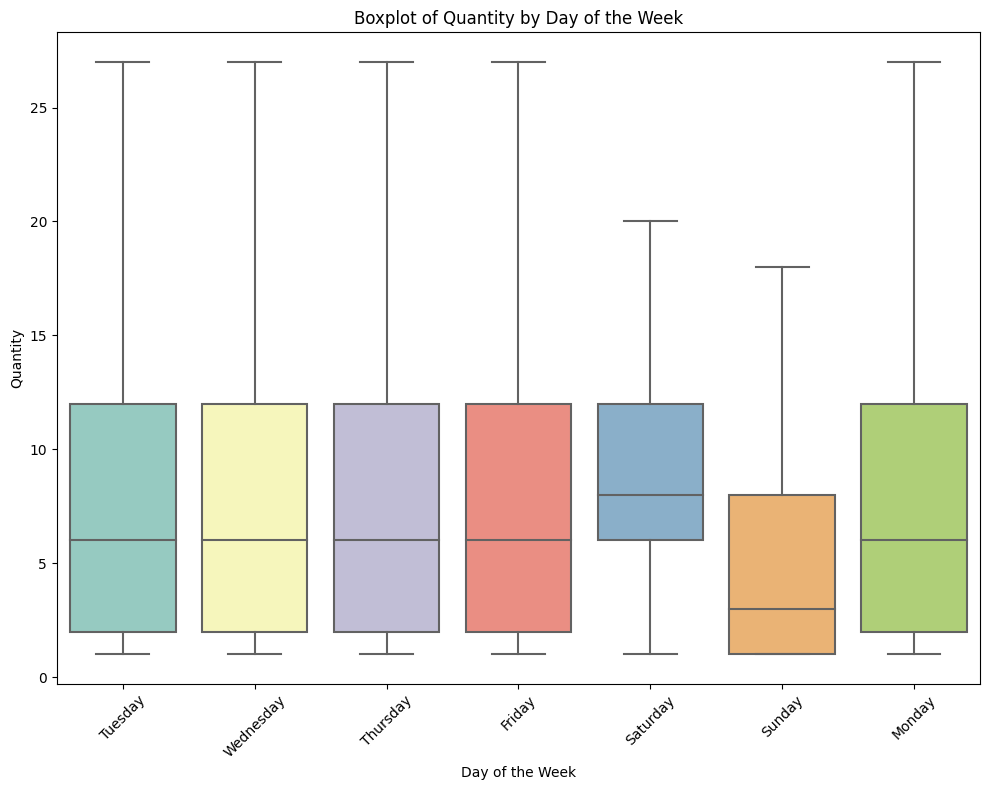

In [52]:
plt.figure(figsize=(10, 8))
boxplot = sns.boxplot(data=data, x='DayOfWeek', y='Quantity', palette='Set3', showfliers=False)
boxplot.set_title('Boxplot of Quantity by Day of the Week')
boxplot.set_xlabel('Day of the Week')
boxplot.set_ylabel('Quantity')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

##Association Rule Analysis

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Function to preprocess transactions
def preprocess_transactions(data):
    transactions = data.groupby('Transaction_id')['Product_id'].apply(list).tolist()
    return transactions

# Preprocess the transactions
transactions = preprocess_transactions(data)

# Initialize the TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

metric can choose 'support', 'confidence', 'lift', 'leverage', 'conviction'

In [ ]:
'''rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.05)#＞0.05 may exist an error
top_rules = rules.nlargest(10, 'support')
for i, rule in top_rules.iterrows():
    print(f"Rule: {rule['antecedents']} -> {rule['consequents']}")
    print(f"Support: {rule['support']:.6f}\n")'''

In [90]:
# Support metric
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
rules['support'] = rules['support'].astype(float)
top_rules = rules.sort_values('support', ascending=False).head(10)
for i, rule in top_rules.iterrows():
    print(f"Rule: {rule['antecedents']} -> {rule['consequents']}  Support: {rule['support']:.6f}")

Rule: frozenset({'21733'}) -> frozenset({'85123A'})  Support: 0.031160
Rule: frozenset({'85123A'}) -> frozenset({'21733'})  Support: 0.031160
Rule: frozenset({'22386'}) -> frozenset({'85099B'})  Support: 0.029584
Rule: frozenset({'85099B'}) -> frozenset({'22386'})  Support: 0.029584
Rule: frozenset({'20725'}) -> frozenset({'22384'})  Support: 0.028208
Rule: frozenset({'22384'}) -> frozenset({'20725'})  Support: 0.028208
Rule: frozenset({'20725'}) -> frozenset({'20727'})  Support: 0.027577
Rule: frozenset({'20727'}) -> frozenset({'20725'})  Support: 0.027577
Rule: frozenset({'82494L'}) -> frozenset({'82482'})  Support: 0.027147
Rule: frozenset({'82482'}) -> frozenset({'82494L'})  Support: 0.027147


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
# Confidence metric
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
top_rules = rules.nlargest(10, 'confidence')
for i, rule in top_rules.iterrows():
    print(f"Rule: {rule['antecedents']} -> {rule['consequents']} ")
    print(f"Confidence: {rule['confidence']:.6f}")

Rule: frozenset({'22699', '22698'}) -> frozenset({'22697'}) 
Confidence: 0.900175
Rule: frozenset({'22698', '22423'}) -> frozenset({'22697'}) 
Confidence: 0.891089
Rule: frozenset({'22746'}) -> frozenset({'22748'}) 
Confidence: 0.886105
Rule: frozenset({'21086', '21080'}) -> frozenset({'21094'}) 
Confidence: 0.879093
Rule: frozenset({'22698', '22423'}) -> frozenset({'22699'}) 
Confidence: 0.868812
Rule: frozenset({'22697', '22698'}) -> frozenset({'22699'}) 
Confidence: 0.859532
Rule: frozenset({'22745'}) -> frozenset({'22748'}) 
Confidence: 0.852273
Rule: frozenset({'22698'}) -> frozenset({'22697'}) 
Confidence: 0.847025
Rule: frozenset({'22697', '22423'}) -> frozenset({'22699'}) 
Confidence: 0.840000
Rule: frozenset({'22746'}) -> frozenset({'22745'}) 
Confidence: 0.833713


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
# Lift metric
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
top_rules = rules.nlargest(10, 'lift')
for i, rule in top_rules.iterrows():
    print(f"Rule: {rule['antecedents']} -> {rule['consequents']}")
    print(f"Lift: {rule['lift']:.6f}")

Rule: frozenset({'22746'}) -> frozenset({'22745'})
Lift: 55.081901
Rule: frozenset({'22745'}) -> frozenset({'22746'})
Lift: 55.081901
Rule: frozenset({'22748'}) -> frozenset({'22746'})
Lift: 53.020376
Rule: frozenset({'22746'}) -> frozenset({'22748'})
Lift: 53.020376
Rule: frozenset({'22745'}) -> frozenset({'22748'})
Lift: 50.996024
Rule: frozenset({'22748'}) -> frozenset({'22745'})
Lift: 50.996024
Rule: frozenset({'21086', '21080'}) -> frozenset({'21094'})
Lift: 45.431537
Rule: frozenset({'21094'}) -> frozenset({'21086', '21080'})
Lift: 45.431537
Rule: frozenset({'21240'}) -> frozenset({'21239'})
Lift: 44.474702
Rule: frozenset({'21239'}) -> frozenset({'21240'})
Lift: 44.474702


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
#Leverage metric
rules = association_rules(frequent_itemsets, metric="leverage", min_threshold=0.01)
top_rules = rules.nlargest(10, 'leverage')
for i, rule in top_rules.iterrows():
    print(f"Rule: {rule['antecedents']} -> {rule['consequents']}")
    print(f"Leverage: {rule['leverage']:.6f}")

Rule: frozenset({'22386'}) -> frozenset({'85099B'})
Leverage: 0.025191
Rule: frozenset({'85099B'}) -> frozenset({'22386'})
Leverage: 0.025191
Rule: frozenset({'21733'}) -> frozenset({'85123A'})
Leverage: 0.025188
Rule: frozenset({'85123A'}) -> frozenset({'21733'})
Leverage: 0.025188
Rule: frozenset({'82494L'}) -> frozenset({'82482'})
Leverage: 0.024934
Rule: frozenset({'82482'}) -> frozenset({'82494L'})
Leverage: 0.024934
Rule: frozenset({'20725'}) -> frozenset({'22384'})
Leverage: 0.024587
Rule: frozenset({'22384'}) -> frozenset({'20725'})
Leverage: 0.024587
Rule: frozenset({'20725'}) -> frozenset({'20727'})
Leverage: 0.023712
Rule: frozenset({'20727'}) -> frozenset({'20725'})
Leverage: 0.023712


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
#Conviction metric
rules = association_rules(frequent_itemsets, metric="conviction", min_threshold=1.5)
top_rules = rules.nlargest(10, 'conviction')
for i, rule in top_rules.iterrows():
    print(f"Rule: {rule['antecedents']} -> {rule['consequents']}")
    print(f"Conviction: {rule['conviction']:.6f}")

Rule: frozenset({'22699', '22698'}) -> frozenset({'22697'})
Conviction: 9.760242
Rule: frozenset({'22698', '22423'}) -> frozenset({'22697'})
Conviction: 8.945982
Rule: frozenset({'22746'}) -> frozenset({'22748'})
Conviction: 8.633264
Rule: frozenset({'21086', '21080'}) -> frozenset({'21094'})
Conviction: 8.110794
Rule: frozenset({'22698', '22423'}) -> frozenset({'22699'})
Conviction: 7.400850
Rule: frozenset({'22697', '22698'}) -> frozenset({'22699'})
Conviction: 6.911909
Rule: frozenset({'22745'}) -> frozenset({'22748'})
Conviction: 6.656100
Rule: frozenset({'22698'}) -> frozenset({'22697'})
Conviction: 6.369132
Rule: frozenset({'22697', '22423'}) -> frozenset({'22699'})
Conviction: 6.068147
Rule: frozenset({'22746'}) -> frozenset({'22745'})
Conviction: 5.922676


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
